# HW4. 시간의존 슈뢰딩거 방정식

**HW problem 1. Time evolution of particle in a box (20pts)**


1. $t=0$에 전자의 파동함수가 $\dfrac{L}{2}$에 집중된 경우, $\psi(x, t =0) = \dfrac{1}{\sqrt{\sqrt{2\pi}\sigma}}e^{-\frac{(x-\frac{L}{2})^2}{2\sigma^2}}$이다. ($\sigma = \dfrac{L}{10}$) \\
이 경우 파동함수가 시간에 따라 퍼져나가게 된다. $\psi(x,t)$를 시간에 따라 그려서 확인해보세요. \\
($\psi(x, t)$의 $Re(\psi(x, t)), Im(\psi(x, t)), |\psi(x, t)|^2$ 세 가지를 그리시오.)

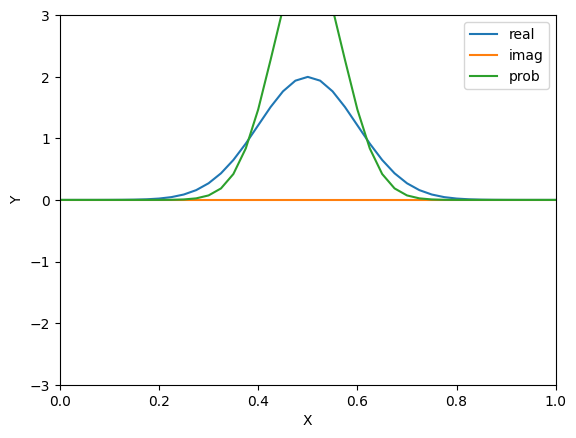

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 0.5; L = 1; sigma = L/10
niter = 100000
nframes = 100
draw_interval = 1/500

dx = L/40 ; dt=1/niter;
x=np.arange(0, L+dx, dx)
t= np.arange(0, T+dt, dt)

V= np.zeros_like(x)
V[0] = V[-1] = float("inf")

def normalize(y):
    norm = np.sqrt(np.sum(np.abs(y)**2) * dx)
    return y / norm

def update(frame):
    global ydata
    dt=1/niter
    for i in range(int(niter*draw_interval)):
        ydata[1:-1]=ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    ydata = normalize(ydata)
    line_real.set_ydata(ydata.real)
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_imag, line_prob

# 초기 설정
fig, ax = plt.subplots()
ydata = (1 / (((2 * np.pi) ** 0.5 * sigma) ** 0.5)) * np.exp(-((x - L / 2) ** 2) / (2 * sigma**2)) + 0j
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-3.0, 3.0)  # y축 범위 설정
ax.set_xlim(0, L)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani=FuncAnimation(fig,update,frames=np.arange(0,nframes+1/niter,1), blit=False, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

위의 코드는 시간에 따른 전자의 파동함수의 전파를 그린 그래프이다.
시간 의존 슈뢰딩거 방정식의 경우 다음과 같이 표현할 수 있다.
$$i\hbar \dfrac{d\psi}{dt} = -\dfrac{\hbar^2}{2m}\dfrac{d^2\psi}{dx^2}+V\psi$$ \\
위의 식을 Discretization하여 $\Delta t$와 $\Delta x$에 관한 식으로 나타내면
$$i\hbar \dfrac{\psi_{m,n+1} - \psi_{m,n}}{\Delta t} = - \dfrac{\hbar^2}{2m} \dfrac{\psi_{m+1,n} - 2\psi_{m,n} + \psi_{m-1,n}}{\Delta x^2} + V_{m,n} \psi_{m,n}$$
과 같이 표현 가능하다.

위의 코드에서 식에 사용되는 변수인 $\hbar$, $m$, $L$은 1로 설정하였으며, $T$는 0.5로 설정하였다. $dx$는 $\dfrac{L}{40}$, $dt$는 $\dfrac{1}{niter}$로 설정하였다.
변수 niter는 초당 몇번의 연산을 수행할 지를 나타내는 변수로 100000으로 설정하였다. 변수 draw_interval은 몇초당 한번씩 그림을 그릴지를 나타내며 1/500으로 설정하였다. 리스트 x는 $0 \sim L+dx$의 값을 $dx$의 간격으로 나눈 리스트이다. 리스트 t는 $0 \sim T+dt$의 값을 $dt$의 간격으로 나눈 리스트이다. 리스트 V는 슈뢰딩거 방정식의 $V$를 나타낸 것으로, 리스트의 0번째 원소와 마지막 원소는 $\infty$로 지정하였으며, 나머지 원소는 0으로 설정하여 문제에서 주어진 무한 우물 퍼텐셜의 경계조건을 만족하도록 설정하였다. 사용자 정의 함수 normalize는 리스트 y를 입력받아 파동함수의 확률합이 1이 되도록 정규화해주는 함수로, 입력받은 y를 리스트의 각 원소의 제곱값의 합으로 나눈 값을 반환한다. 사용자 정의 함수 update는 시간에 따라 슈뢰딩거 방정식의 $\psi$값을 업데이트 해주는 함수이다. 먼저 $\psi$의 값을 나타내는 변수 ydata를 전역변수로 선언하였으며, 함수 내의
```
ydata[1:-1] = ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
```
는 이산화 된 슈뢰딩거 방정식의 $\psi_{m,1} = \psi_{m,0} + \dfrac{\Delta t}{i\hbar} \left( -\dfrac{\hbar^2}{2m} \dfrac{\psi_{m+1,0} - 2\psi_{m,0} + \psi_{m-1,0}}{\Delta x^2} + V_{m,0}\psi_{m,0} \right)$
식을 의미한다. 위 코드는 frame에 따라 dt와 dx를 통해 ydata의 값을 업데이트 한다.
이후 ydata의 실수부분, 허수부분, 제곱값(확률)을 나타내는 line_real, line_prob, line_imag을 반환하였다. \\
ydata의 초기값은 문제에서 주어진 대로 $\psi(x, t =0) = \dfrac{1}{\sqrt{\sqrt{2\pi}\sigma}}e^{-\frac{(x-\frac{L}{2})^2}{2\sigma^2}}$로 지정하였으며 ($\sigma = \dfrac{L}{10}$), line_real, line_prob, line_imag에 대해 각각 그래프를 작성하여 HTML5를 통해 시간에 따라 그래프가 움직이도록 영상으로 표현하였다. \\
위의 그래프를 통해 주어진 파동함수가 $x=\dfrac{L}{2}$을 기점으로 시간에 따라 퍼져나가는것을 확인할 수 있다.

**HW problem 2. Electron transmission at potential barrier** \\
초기조건: $x=0$에서부터 에너지 $E$로 potential로 돌진하는 전자. \\
$$\psi(x, t =0) = \dfrac{1}{\sqrt{\sqrt{2\pi}\sigma}}e^{-\frac{x^2}{2\sigma^2}}e^{ik_0x} \qquad (\sigma = 3a, k_0=\dfrac{\sqrt{2mE}}{\hbar})$$

1) $E = 2V_0, 0.5V_0$에 대해 $\psi(x, t)$를 그리시오. (30pts) \\
($\psi(x, t)$의 $Re(\psi(x, t)), Im(\psi(x, t)), |\psi(x, t)|^2$ 세 가지를 그리시오.)

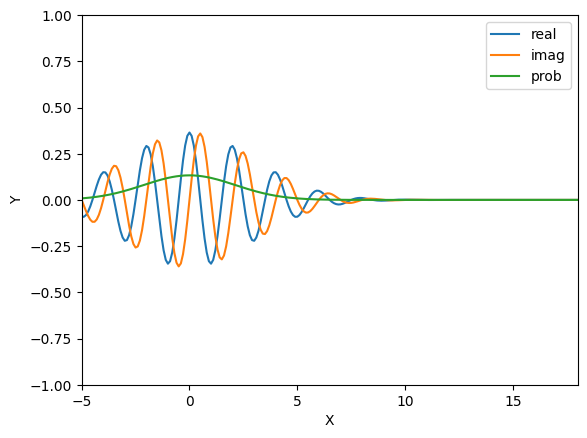

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 0.5; a = 1; sigma = 3*a
V0 = 1/(4*m)*(np.pi*hbar/a)**2
dx = a/10 ; dt=1/niter;
E = 2*V0
k = (2*m*E)**0.5/hbar

x=np.arange(-100*a, 100*a+dx, dx)
t= np.arange(0, T+dt, dt)
niter = 100000
nframes = 100
draw_interval = 1/10

V = np.zeros_like(x)
V[(x >= 9 * a) & (x <= 10 * a)] = V0

def normalize(y):
    norm = np.sqrt(np.sum(np.abs(y)**2) * dx)
    return y / norm

def update(frame):
    global ydata
    dt=1/niter
    for i in range(int(niter*draw_interval)):
        ydata[1:-1]=ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    ydata = normalize(ydata)
    line_real.set_ydata(ydata.real)
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_imag, line_prob

# 초기 설정
fig, ax = plt.subplots()
ydata = (1 / (((2 * np.pi) ** 0.5 * sigma) ** 0.5)) * np.exp(-(x ** 2) / (2 * sigma**2)) *np.exp(1j*k*x)
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-1.0, 1.0)  # y축 범위 설정
ax.set_xlim(-5*a, 18*a)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani=FuncAnimation(fig,update,frames=np.arange(0,nframes+1/niter,1), blit=False, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

위의 코드는 $E=2V_0$일 때 potential barrier로 달려가는 $\psi(x, t)$를 시간에 따른 그래프로 나타낸 코드이다. 위의 코드에서 식에 사용되는 변수인 $\hbar$, $m$은 1로 설정하였으며, $T$는 0.5로 설정하였다. 변수 a는 1.0으로 설정하였으며, $\sigma$를 나타내는 변수 sigma는 문제에서 주어진 대로 3a로 설정하였다. 변수 E는 2V0으로 설정하였으며, 변수 k는 $\dfrac{\sqrt{2mE}}{\hbar}로 설정하였다. $potential barrier의 값 V0는 문제에서 주어진대로 $\dfrac{1}{4m}\dfrac{\pi\hbar}{a}^2$으로 설정하였고  $dx$는 $\dfrac{a}{10}$, $dt$는 $\dfrac{1}{niter}$로 설정하였다.
변수 niter는 초당 몇번의 연산을 수행할 지를 나타내는 변수로 100000으로 설정하였다. 변수 draw_interval은 몇초당 한번씩 그림을 그릴지를 나타내며 1/10으로 설정하였다.
리스트 x는 $-100a \sim 100a+dx$의 값을 $dx$의 간격으로 나눈 리스트이다. 리스트 t는 $0 \sim T+dt$의 값을 $dt$의 간격으로 나눈 리스트이다. 리스트 V는 위치에 따른 potential을 나타낸 리스트로, $9a \leq x \leq 10a$에서 $V = V_0$로, 나머지 구간에서는 $V=0$으로 설정하였다. 사용자 정의 함수는 1번 문제와 동일하게 설정하였으며, ydata의 초깃값은 $\psi(x, t =0) = \dfrac{1}{\sqrt{\sqrt{2\pi}\sigma}}e^{-\frac{x^2}{2\sigma^2}}e^{ik_0x}$으로 설정하였으며, line_real, line_prob, line_imag에 대해 각각 그래프를 작성하여 HTML5를 통해 시간에 따라 그래프가 움직이도록 영상으로 표현하였다. 위의 그래프 영상을 통해 $E = 2V_0$일때 파동함수 $\psi$가 potential barrier를 대체적으로 잘 통과하며, 일부는 반사된다는 사실을 영상으로 확인할 수 있다.

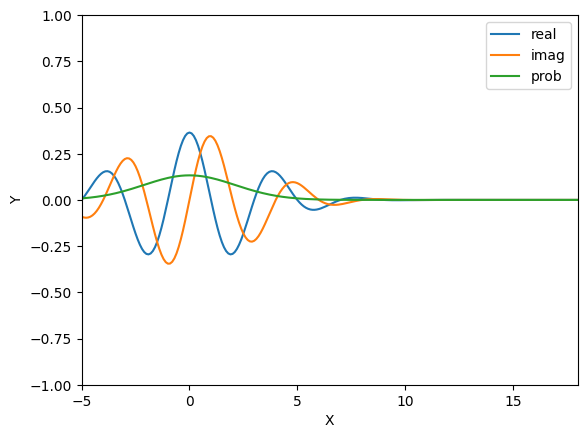

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 0.5; a = 1; sigma = 3*a
V0 = 1/(4*m)*(np.pi*hbar/a)**2
dx = a/10
dt=1/niter
E = 0.5*V0
k = (2*m*E)**0.5/hbar

x=np.arange(-100*a, 100*a+dx, dx)
t= np.arange(0, T+dt, dt)
niter = 100000
nframes = 100
draw_interval = 1/10

V = np.zeros_like(x)
V[(x >= 9 * a) & (x <= 10 * a)] = V0

def normalize(y):
    norm = np.sqrt(np.sum(np.abs(y)**2) * dx)
    return y / norm

def update(frame):
    global ydata
    dt=1/niter
    for i in range(int(niter*draw_interval)):
        ydata[1:-1]=ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    ydata = normalize(ydata)
    line_real.set_ydata(ydata.real)
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_imag, line_prob

# 초기 설정
fig, ax = plt.subplots()
ydata = (1 / (((2 * np.pi) ** 0.5 * sigma) ** 0.5)) * np.exp(-(x ** 2) / (2 * sigma**2)) *np.exp(1j*k*x)
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-1.0, 1.0)  # y축 범위 설정
ax.set_xlim(-5*a, 18*a)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani=FuncAnimation(fig,update,frames=np.arange(0,nframes+1/niter,1), blit=False, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

위의 코드는 이전의 $E = 2
V_0$의 코드를 $E=0.5V_0$로 수정한 코드이다. 위의 코드에서 식에 사용되는 변수와 사용자 정의 함수는 $E=2V_0$의 코드와 동일하다. 위의 그래프 영상을 통해 $E = 0.5V_0$일때 파동함수 $\psi$가 potential barrier를 거의 통과하지 못하고 반사되지만, 양자 터널링 현상으로 통해 일부는 potential barrier를 통과하는 모습을 확인할 수 있다.

2) $E = 3V_0$에 대해 $\psi(x, t)$를 그리시오. (20pts)



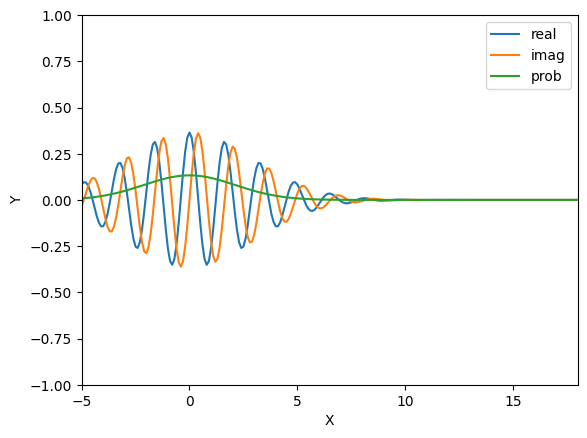

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 0.5; a = 1; sigma = 3*a
V0 = 1/(4*m)*(np.pi*hbar/a)**2
dx = a/10 ;
dt=1/niter
E = 3*V0
k = (2*m*E)**0.5/hbar

x=np.arange(-100*a, 100*a+dx, dx)
t= np.arange(0, T+dt, dt)
niter = 100000
nframes = 100
draw_interval = 1/10

V = np.zeros_like(x)
V[(x >= 9 * a) & (x <= 10 * a)] = V0

def normalize(y):
    norm = np.sqrt(np.sum(np.abs(y)**2) * dx)
    return y / norm

def update(frame):
    global ydata
    dt=1/niter
    for i in range(int(niter*draw_interval)):
        ydata[1:-1]=ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    ydata = normalize(ydata)
    line_real.set_ydata(ydata.real)
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_imag, line_prob

# 초기 설정
fig, ax = plt.subplots()
ydata = (1 / (((2 * np.pi) ** 0.5 * sigma) ** 0.5)) * np.exp(-(x ** 2) / (2 * sigma**2)) *np.exp(1j*k*x)
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-1.0, 1.0)  # y축 범위 설정
ax.set_xlim(-5*a, 18*a)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani=FuncAnimation(fig,update,frames=np.arange(0,nframes+1/niter,1), blit=False, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

위의 코드는 이전의 $E = 2
V_0$의 코드를 $E=3V_0$에서 수정한 코드이다. 위의 코드에서 식에 사용되는 변수와 사용자 정의 함수는 $E=2V_0$의 코드와 동일하다. 위의 그래프 영상을 통해 $E = 3V_0$일때 파동함수 $\psi$가 potential barrier를 잘 통과하며, $E=2V_0$일 때 보다 barrier에서 반사되어 돌아가는 파동함수가 적다는 사실을 확인할 수 있다.

3) 시간이 충분히 지났을 때 $10a<x<\infty$ 구간의 파동함수 적분하면 Transmission ratio $T$ 계산 가능 ($T = \int_{10a}^{\infty}|\psi(x, t)|^2dx$)
$T$를 $E/V_0$의 함수로 그리고, $T$의 local maximum이 나타나는 $E/V_0$ 값을 구하시오. (30pts)

3.6363636363636362


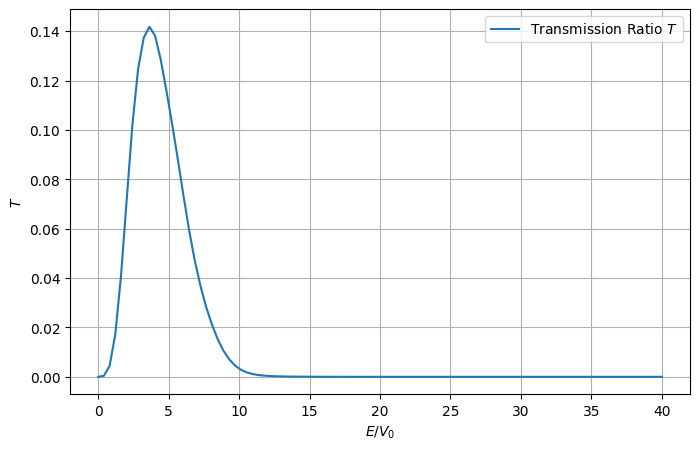

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m = 1; T = 3; a = 1; sigma = 3 * a; L = 15*a
dx = L / 40
dt = 1 / 100

x = np.arange(-100 * a, 100 * a + dx, dx)
t = np.arange(0, T + dt, dt)

V0 = 1 / (4 * m) * (np.pi * hbar / a) ** 2
V = np.zeros_like(x)
V[(x >= 9 * a) & (x <= 10 * a)] = V0

def normalize(y):
    norm = np.sqrt(np.sum(np.abs(y)**2) * dx)
    return y / norm

def transmission_ratio(ydata):
    probab = np.abs(ydata)**2
    T = np.sum(probab[(x >= 10 * a)]) * dx
    return T

def wavefunction(E):
    k = (2 * m * E) ** 0.5 / hbar
    ydata = (1 / (((2 * np.pi) ** 0.5 * sigma) ** 0.5)) * np.exp(-(x ** 2) / (2 * sigma ** 2)) * np.exp(1j * k * x)

    for i in t:
        ydata[1:-1] = ydata[1:-1] + dt / (1j * hbar) * (
            -hbar**2 / (2 * m) * (ydata[2:] - 2 * ydata[1:-1] + ydata[:-2]) / dx**2 + V[1:-1] * ydata[1:-1]
        )
        ydata = normalize(ydata)

    return transmission_ratio(ydata)

ratios = np.linspace(0, 40, 100)
transmission_ratios = []

for ratio in ratios:
    E = ratio * V0
    T = wavefunction(E)
    transmission_ratios.append(T)

peak_index = np.argmax(transmission_ratios)
peak = ratios[peak_index]
print(peak)

plt.figure(figsize=(8, 5))
plt.plot(ratios, transmission_ratios, label="Transmission Ratio $T$")
plt.xlabel('$E / V_0$')
plt.ylabel('$T$')
plt.legend()
plt.grid(True)
plt.show()


위의 코드는 E값에 따른 $\psi(x, t)$가 potential barrier를 통과한 뒤 $10a \sim \infty$ 구간의 파동함수의 확률을 적분한 그래프를 나타내는 코드이다. 변수 $\hbar, m, a$는 1로 가정하였으며, $T$는 3, sigma = 3a, L = 15a로 가정하였다. 변수 dx는 $\dfrac{L}{40}$, dt는 $\dfrac{1}{100}$로 가정하였다. 리스트 x는 $-100a \sim 100a+dx$의 값을 $dx$의 간격으로 나눈 리스트이다. 리스트 t는 $0 \sim T+dt$의 값을 $dt$의 간격으로 나눈 리스트이다. 리스트 V는 위치에 따른 potential을 나타낸 리스트로, $9a \leq x \leq 10a$에서 $V = V_0$로, 나머지 구간에서는 $V=0$으로 설정하였다. \\
사용자 정의 함수 normalize는 파동함수를 정규화해주는 함수로 이전 문제와 동일하다. 사용자 정의 함수 transmission_ratio는 리스트 ydata를 입력받아 $x>10a$ 구간의 파동함수의 확률함수의 넓이를 반환하는 함수로, 구분구적법의 원리를 이용해 넓이를 구하도록 작성하였다. 사용자 정의 함수 wavefunction은 리스트 ydata를 입력받아 리스트 t의 원소에 대해 ydata값을 업데이트한 뒤 정규화하여 최종적으로 ydata의 transmission ratio를 반환한다. \\
배열 ratios는 $E/V_0$의 값을 나타내며, $0 \sim 40$의 값을 100등분하여 저장하였다. 리스트 transmission_ratios는 $E/V_0$의 값에 따른 transmission ratio값을 저장한다. 이후 for문과 사용자 정의 함수 transmission_ratio를 활용해 ratios의 값에 따른 transmission ratio 값을 리스트 transmission_ratios에 저장하도록 하였다. \\
위의 그래프를 통해 $E/V_0$이 3.63일 때 transmission ratio의 값이 local maximum을 가짐을 알 수 있다.